#IS 470 EXAM 1

---

## Churn Data Classification
<br>
Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. The companies are interested in identifying customers who were at risk of churning, so they could proactively engage them with special offers instead of simply losing them.
<br><br>
The churn dataset consists information of 20,000 customers of a telecommunication company.
The target variable, LEAVE, is the last variable, and its values are LEAVE and STAY. 
<br>
VARIABLE DESCRIPTIONS:<br>
<br>
COLLEGE : Is the customer college educated?<br>
INCOME : Annual income<br>
OVERAGE : Average overcharges per month<br>
LEFTOVER : Average % leftover minutes per month<br>
HOUSE : Value of dwelling (from census tract)<br>
HANDSET_PRICE : Cost of phone<br>
OVER_15MINS_CALLS_PER_MONTH : Average number of long (>15 mins) calls per month <br>
AVERAGE_CALL_DURATION : Average call duration<br>
REPORTED_SATISFACTION : Reported level of satisfaction <br>
REPORTED_USAGE_LEVEL : Self-reported usage level <br>
CONSIDERING_CHANGE_OF_PLAN : Was customer considering changing his/her plan? <br>
LEAVE : whether customer left or stayed<br>
<br>
**Target variable: LEAVE**

## 1.Upload and clean data

In [1]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving churn.csv to churn.csv
User uploaded file "churn.csv" with length 1355420 bytes


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [3]:
# Read data
churn = pd.read_csv('churn.csv')
churn

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,zero,153252,0,23,368403,597,1,6,very_sat,little,actively_looking_into_it,STAY
19996,one,107126,71,82,237397,609,5,2,very_sat,very_little,no,STAY
19997,zero,78529,0,66,172589,275,0,2,unsat,very_high,considering,LEAVE
19998,zero,78674,47,41,572406,288,4,2,very_unsat,little,considering,LEAVE


In [4]:
# Examine the number of rows and cols
churn.shape

(20000, 12)

In [5]:
# Change categorical variables to "category"
churn['COLLEGE'] = churn['COLLEGE'].astype('category')
churn['REPORTED_SATISFACTION'] = churn['REPORTED_SATISFACTION'].astype('category')
churn['REPORTED_USAGE_LEVEL'] = churn['REPORTED_USAGE_LEVEL'].astype('category')
churn['CONSIDERING_CHANGE_OF_PLAN'] = churn['CONSIDERING_CHANGE_OF_PLAN'].astype('category')
churn['LEAVE'] = churn['LEAVE'].astype('category')

In [6]:
# Examine variable type
churn.dtypes

COLLEGE                        category
INCOME                            int64
OVERAGE                           int64
LEFTOVER                          int64
HOUSE                             int64
HANDSET_PRICE                     int64
OVER_15MINS_CALLS_PER_MONTH       int64
AVERAGE_CALL_DURATION             int64
REPORTED_SATISFACTION          category
REPORTED_USAGE_LEVEL           category
CONSIDERING_CHANGE_OF_PLAN     category
LEAVE                          category
dtype: object

## 2.Data partitioning and inspection code

In [7]:
# Create dummy variables for COLLEGE, REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, and CONSIDERING_CHANGE_OF_PLAN (1 point)
churn = pd.get_dummies(churn, columns=['COLLEGE','REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN'], drop_first=True)
churn

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE,COLLEGE_zero,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,31953,0,6,313378,161,0,4,STAY,1,0,1,0,0,0,1,0,0,0,0,1,0
1,36147,0,13,800586,244,0,6,STAY,0,0,1,0,0,0,1,0,0,1,0,0,0
2,27273,230,0,305049,201,16,15,STAY,0,0,1,0,0,0,0,0,1,0,0,0,1
3,120070,38,33,788235,780,3,2,LEAVE,1,0,1,0,0,0,0,1,0,1,0,0,0
4,29215,208,85,224784,241,21,1,STAY,0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,153252,0,23,368403,597,1,6,STAY,1,0,0,1,0,0,1,0,0,0,0,0,0
19996,107126,71,82,237397,609,5,2,STAY,0,0,0,1,0,0,0,0,1,0,0,1,0
19997,78529,0,66,172589,275,0,2,LEAVE,1,0,1,0,0,0,0,1,0,1,0,0,0
19998,78674,47,41,572406,288,4,2,LEAVE,1,0,0,0,1,0,1,0,0,1,0,0,0


In [8]:
# Define target and predictors
target = churn['LEAVE']
predictors = churn.drop(['LEAVE'],axis=1)

In [9]:
# Apply minmax normalization on predictors (2 points)
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE_zero,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0.085343,0.005935,0.067416,0.192208,0.040312,0.000000,0.214286,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.115305,0.005935,0.146067,0.765398,0.148244,0.000000,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.051909,0.688427,0.000000,0.182410,0.092328,0.551724,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.714858,0.118694,0.370787,0.750868,0.845254,0.103448,0.071429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.065783,0.623145,0.955056,0.087979,0.144343,0.724138,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.951913,0.005935,0.258427,0.256944,0.607282,0.034483,0.357143,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.622385,0.216617,0.921348,0.102818,0.622887,0.172414,0.071429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19997,0.418086,0.005935,0.741573,0.026573,0.188557,0.000000,0.071429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19998,0.419122,0.145401,0.460674,0.496949,0.205462,0.137931,0.071429,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (2 points)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(14000, 20) (6000, 20) (14000,) (6000,)


## 3.KNN training and testing.

In [11]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 10 (2 point)
model1 = KNeighborsClassifier(n_neighbors=10)
model1.fit(predictors_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [12]:
# Make predictions on testing data (1 point)
prediction_on_test = model1.predict(predictors_test)

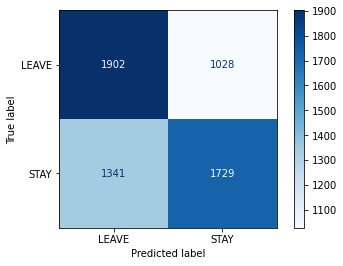

In [13]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model1, predictors_test, target_test, cmap= plt.cm.Blues, values_format='d')

In [14]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

       LEAVE       0.59      0.65      0.62      2930
        STAY       0.63      0.56      0.59      3070

    accuracy                           0.61      6000
   macro avg       0.61      0.61      0.60      6000
weighted avg       0.61      0.61      0.60      6000



***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_EXAM1.ipynb file***
2.   ***Upload the IS470_EXAM1.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [15]:
!jupyter nbconvert --to html IS470_EXAM1.ipynb

[NbConvertApp] Converting notebook IS470_EXAM1.ipynb to html
[NbConvertApp] Writing 324759 bytes to IS470_EXAM1.html
